# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

# Data Pre Processing

## Loading Data

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "insurance.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mirichoi0218/insurance",
  file_path,
)

df.head()

/tmp/ipykernel_13/3371164350.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploring data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Make sure there is no null 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# how many regions we have
df['region'].nunique()

4

In [6]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


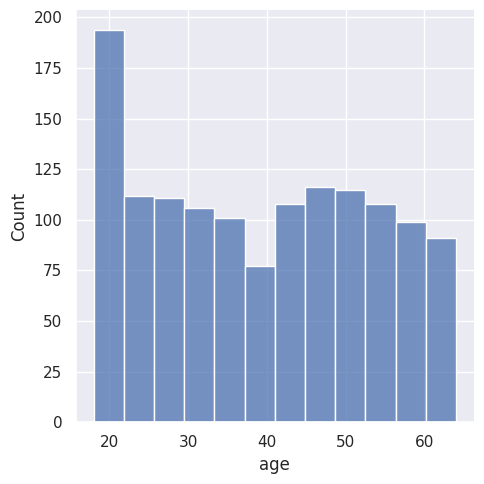

In [7]:
#distribution of ages
sns.displot(df['age'])

Most Of Them are 20's

<Axes: xlabel='sex', ylabel='count'>

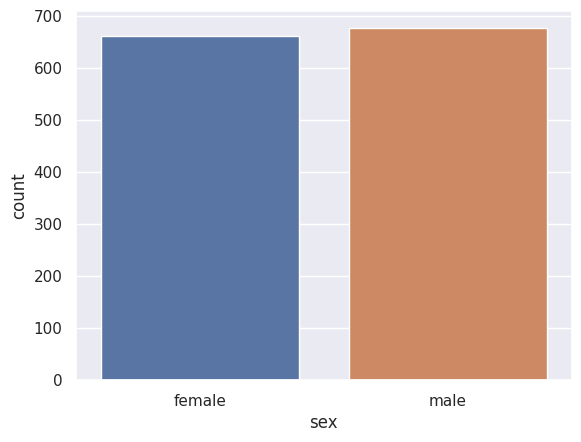

In [8]:
#how many males and females
sns.countplot(data = df , x='sex')

Almost similiar but males are slightly more than females

<Axes: xlabel='bmi', ylabel='charges'>

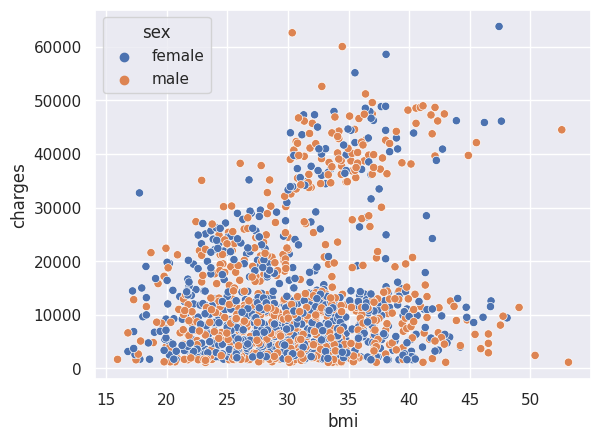

In [9]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='sex')

After 30 bmi charges increased for both genders

In [10]:
from IPython.display import HTML

HTML('<img src=https://cdn3.vectorstock.com/i/1000x1000/35/82/body-mass-index-vector-29233582.jpg>')

### Acording to this image 30bmi is the start of having a moderate obese level

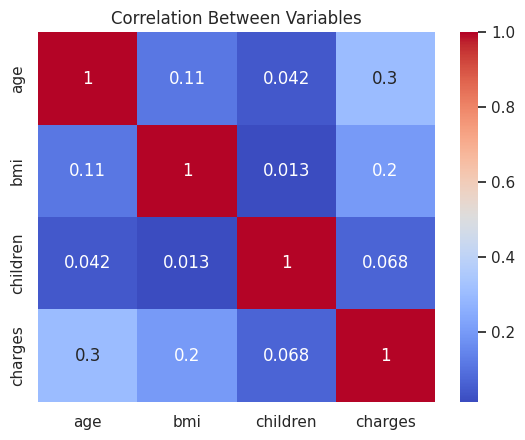

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

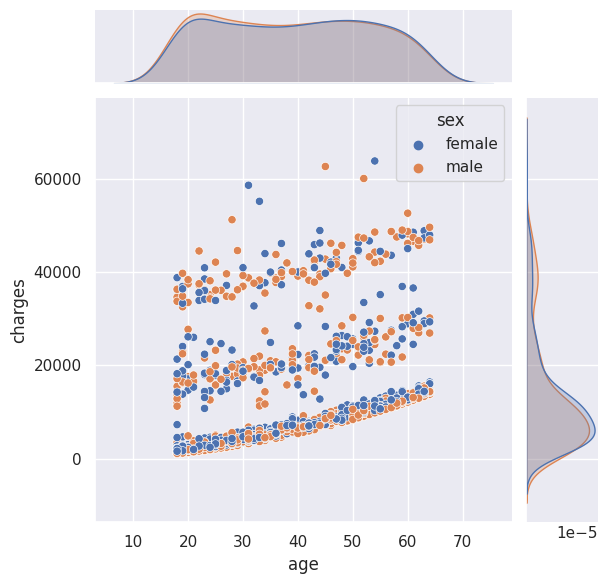

In [12]:
sns.jointplot(data=df, x='age', y='charges', hue='sex')

Another positive relation between age and cost

<Axes: xlabel='bmi', ylabel='charges'>

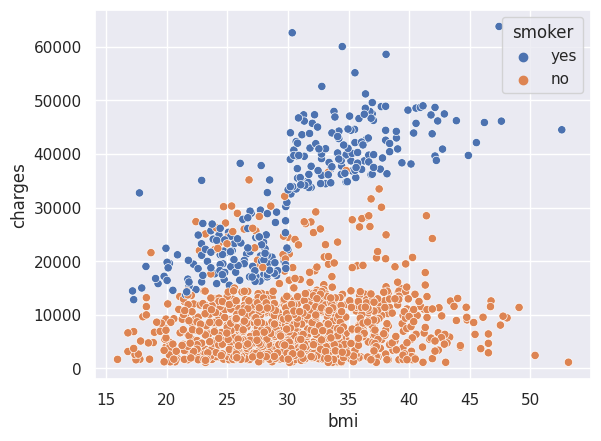

In [13]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')

### Smokers cost Is Way bigger compared to non smokers cost

In [14]:
from IPython.display import HTML

HTML('<img src=https://media1.tenor.com/m/-UVe9cvCFLwAAAAC/dont-need-them-throw.gif>')

# Feature Engineering

## Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
smoker_le = LabelEncoder()
sex_le = LabelEncoder()

In [17]:
df['smoker'] = smoker_le.fit_transform(df['smoker'])

In [18]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [19]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [20]:
df['sex']= sex_le.fit_transform(df['sex'])

In [21]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False
1334,18,0,31.920,0,0,2205.98080,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,True


## Splitting data

In [22]:
from  sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
X = df.drop('charges',axis=1)
y=df['charges']

In [24]:
X_train , X_test ,y_train  , y_test = train_test_split(X,y,test_size=0.2)

# Training

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train , y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"----- Linear Regression Performance -----")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")


----- Linear Regression Performance -----
R-squared (R²): 0.7570
Root Mean Squared Error (RMSE): $5808.70


## Gradiant decent

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
sgd_model = SGDRegressor(random_state=42,tol=1e-3)

In [33]:
# Fit the model to the SCALED training data
sgd_model.fit(X_train_scaled, y_train)

# 5. Make Predictions and Evaluate
y_pred_sgd = sgd_model.predict(X_test_scaled)

r2_sgd = r2_score(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))

print(f"----- SGD Regressor (Gradient Descent) Performance -----")
print(f"R-squared (R²): {r2_sgd:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_sgd:.2f}")

----- SGD Regressor (Gradient Descent) Performance -----
R-squared (R²): 0.7566
Root Mean Squared Error (RMSE): $5813.40


## Random forest regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rfr = RandomForestRegressor()

In [36]:
rfr.fit(X_train_scaled , y_train)

RandomForestRegressor()

In [37]:
rfr_pred = rfr.predict(X_test_scaled)

In [38]:
r2_rfr = r2_score(y_test, rfr_pred)
rmse_rfr = np.sqrt(mean_squared_error(y_test, rfr_pred))

print(f"----- random Foresr regeression Performance -----")
print(f"R-squared (R²): {r2_rfr:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_rfr:.2f}")

----- random Foresr regeression Performance -----
R-squared (R²): 0.8420
Root Mean Squared Error (RMSE): $4684.20


## XGBoost

In [39]:
import xgboost as xgb

In [40]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [41]:
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"----- XGBoost Regressor Performance -----")
print(f"R-squared (R²): {r2_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_xgb:.2f}")

----- XGBoost Regressor Performance -----
R-squared (R²): 0.8156
Root Mean Squared Error (RMSE): $5059.10


## Best score was Random forest regressor so lets tune it

In [42]:
from sklearn.model_selection import GridSearchCV

# --- Define the Hyperparameter Grid to Search ---
# We'll test different combinations of the number of trees and their depth.
param_grid = {
    'n_estimators': [100, 150, 200],      # Number of trees in the forest
    'max_depth': [10, 20, 30],             # Maximum depth of the tree
    'min_samples_split': [2, 5],           # Minimum samples required to split a node
    'min_samples_leaf': [1, 2]             # Minimum samples required at a leaf node
}

# --- Set up and Run the Grid Search ---
# Initialize the base model
rfr = RandomForestRegressor(random_state=42)

# Set up GridSearchCV to test all parameter combinations using 3-fold cross-validation
# verbose=2 will print progress so you know it's working
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

print("Tuning Random Forest... (This may take a few minutes)")
grid_search.fit(X_train, y_train)
print("Tuning complete.")

# --- Display the Best Results ---
print("\n----- Best Hyperparameters for Random Forest -----")
print(grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# --- Evaluate the Tuned Model ---
y_pred_tuned_rf = best_rf_model.predict(X_test)

r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)
rmse_tuned_rf = np.sqrt(mean_squared_error(y_test, y_pred_tuned_rf))

print("\n----- Tuned Random Forest Performance -----")
print(f"R-squared (R²): {r2_tuned_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_tuned_rf:.2f}")

Tuning Random Forest... (This may take a few minutes)
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Tuning complete.

----- Best Hyperparameters for Random Forest -----
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}

----- Tuned Random Forest Performance -----
R-squared (R²): 0.8536
Root Mean Squared Error (RMSE): $4508.92


In [43]:
tuned_rfr = RandomForestRegressor(n_estimators=200 , min_samples_leaf= 2 , min_samples_split=5 ,random_state=42 )

In [44]:
tuned_rfr.fit(X_train_scaled , y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [45]:
rfr_tuned_pred = tuned_rfr.predict(X_test_scaled)

In [46]:
r2_tuned_rfr = r2_score(y_test, rfr_tuned_pred)
rmse_tuned_rfr = np.sqrt(mean_squared_error(y_test, rfr_tuned_pred))

print(f"----- random Foresr regeression Performance -----")
print(f"R-squared (R²): {r2_tuned_rfr:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_tuned_rfr:.2f}")

----- random Foresr regeression Performance -----
R-squared (R²): 0.8514
Root Mean Squared Error (RMSE): $4542.69


# deployment

In [47]:
import joblib

# Assume 'best_model' is your finalized, trained model (e.g., grid_search.best_estimator_)
# Assume 'scaler' is the StandardScaler you fit on the training data

# Save the model to a file
joblib.dump(tuned_rfr, 'insurance_model.pkl')

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']